<a href="https://colab.research.google.com/github/swapnil2009/PyCBC/blob/master/6_01_GradientDescentSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1. Gradient Boosting
- Load the Iris dataset from Sklearn with `load_iris`
- Split data into train and test datasets
- Train a `GRadientBoostingClassifier` model and report the score on the test dataset

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,stratify=iris.target,random_state=0)

In [9]:
gbc=GradientBoostingClassifier().fit(X_train,y_train)
gbc.score(X_test,y_test)

0.9736842105263158

### Step 2. Illustration on synthetic regression dataset
- Create a polynomial dataset using the `make_poly` function 
- Split data into train and test datasets
- Train a `GRadientBoostingRegressor` model and report the score on the test dataset
  - Set `max_depth=2`, `n_estimators=10`, and `learning_rate=.3`

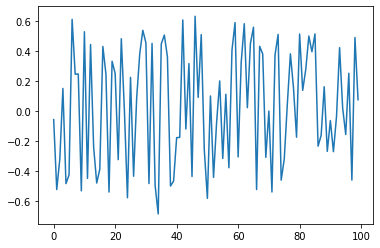

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x))
    y = (y_no_noise + rnd.normal(scale=0.2, size=len(x))) / 2
    return x.reshape(-1, 1), y
X, y = make_wave(100)
plt.plot(y)
def make_poly(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (x) ** 3
    y = (y_no_noise + rnd.normal(scale=3, size=len(x))) / 2
    return x.reshape(-1, 1),y

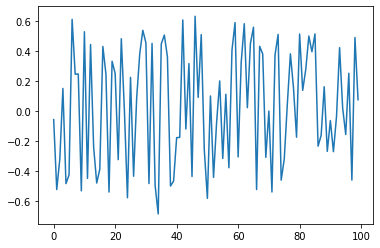

In [22]:
plt.plot(y)

In [24]:
X,y=make_poly()

In [25]:
X.shape

(100, 1)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [28]:
gbs2=GradientBoostingRegressor(max_depth=2,n_estimators=10,learning_rate=0.3,random_state=0)
gbs2.fit(X_train,y_train)
gbs2.score(X_test,y_test)

0.8117763334371788

### Step 3. Simulating Gradient Boosting 
- The `staged_predict()` method measures the validation error at each stage of training (i.e. with one tree, with two trees…) to find the optimal number of trees.
- Create a numpy array of size 1000 between minimum and maximum values of the data set you formed in the previous step
- Create a list of predictions for this numpy array using the Gradient Regressor model you trained in Step 2
- Plot the dataset from Step 2 and your predictions for different values of number of estimators.

In [29]:
line=np.linspace(X.min(),X.max(),1000)

In [30]:
line.shape

(1000,)

In [ ]:
gbs2.predict(line[:,None])

In [ ]:
gbs2.predict(line[:,np.newaxis])

In [37]:
preds=list(gbs2.staged_predict(line[:,np.newaxis]))

In [38]:
len(preds)

10

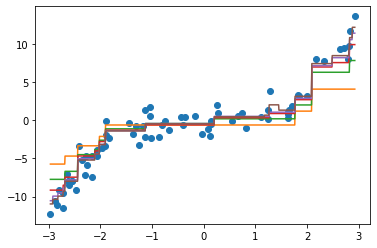

In [43]:
plt.plot(X_train[:,0],y_train,'o',label='training data')
for i in range(1,10,2):
  plt.plot(line,preds[i],label=f"n_estimators={i+1}")

### Step 4. Illustration of Gradient Descent
- Plot the residual and total predictions for `n_estimators = [0, 1, 4, 8]`

### Step 5: Gradient Boosting Regresor on Boston Dataset
- Load Boston dataset from sklearn with `load_boston`
- Split the dataset into train and test datasets
- Train a Gradient Boosting Regressor model and test it on the test dataset
- Execute a grid search over different learning rates for the gradient boosting regressor model.